In [1]:
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes(as_frame=True, scaled=False)

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
data['data'].describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [12]:
data['target'].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [13]:
X = data['data']
y = data['target']
df = data['frame']

In [14]:
X.shape, y.shape

((442, 10), (442,))

In [15]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [16]:
!pip install dataprep

^C


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [18]:
model = LinearRegression()
poly = PolynomialFeatures(degree=2, include_bias=False)

In [19]:
X_aug = poly.fit_transform(X)
model.fit(X_aug, y)


LinearRegression()

In [20]:
y_pred = model.predict(X_aug)

In [21]:
print(f'{model.intercept_:.2f}')
for name, value in zip(data['feature_names'], model.coef_):
    print(f'{name}: {value:.2f}')


3572.32
age: -10.50
sex: -11.46
bmi: -20.87
bp: 4.18
s1: 34.87
s2: -27.09
s3: -49.60
s4: -193.82
s5: -1368.40
s6: -9.95


In [23]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y, y_pred)

49.160779665267455

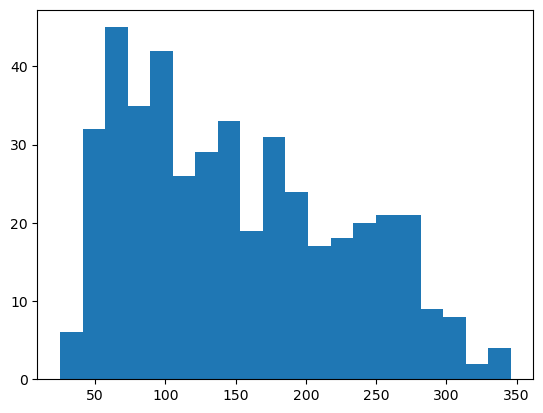

In [24]:
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.show()

In [25]:
import numpy as np

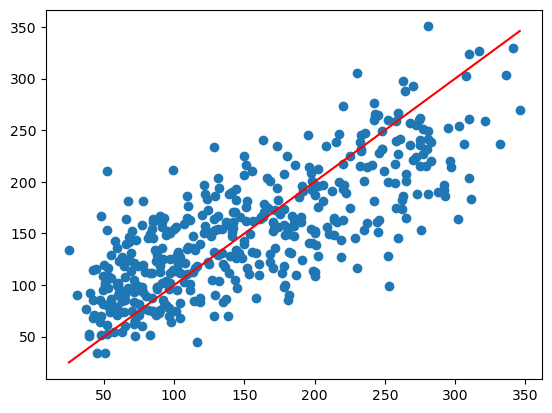

     ---------------------------------------- 9.9/9.9 MB 26.3 MB/s eta 0:00:00
     ---------------------------------------- 380.7/380.7 kB ? eta 0:00:00
     ---------------------------------------- 78.4/78.4 kB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 48.2 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 56.0 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 32.8 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 39.0 MB/s eta 0:00:00
     --------------------------------------- 10.4/10.4 MB 43.5 MB/s eta 0:00:00
     ------------------------------------- 300.0/300.0 kB 19.3 MB/s eta 0:00:00
     ---------------------------------------- 96.1/96.1 kB ? eta 0:00:00
     ---------------------------------------- 273.3/273.3 kB ? eta 0:00:00
     ---------------------------------------- 133.6/133.6 kB ? eta 0:00:00
     ---------------------------------------- 6.4/6.4 MB 45.0 MB/s eta 0:0

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [241 lines of output]
      Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm6

In [26]:
x_aux = np.linspace(y.min(), y.max(), 100)
y_aux = x_aux
plt.figure()
plt.scatter(y, y_pred)
plt.plot(x_aux, y_aux, color='red')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

In [28]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=42,
)

In [29]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [30]:
ypred1 = model1.predict(X_val)

In [33]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_val, ypred1)
rmse

53.37368921191781

In [35]:
print(f'{model1.intercept_:.2f}')
for name, value in zip(data['feature_names'], model1.coef_):
    print(f'{name}: {value:.2f}')


-356.27
age: 0.03
sex: -23.52
bmi: 5.90
bp: 1.12
s1: -1.27
s2: 0.74
s3: 0.64
s4: 10.81
s5: 69.70
s6: 0.34


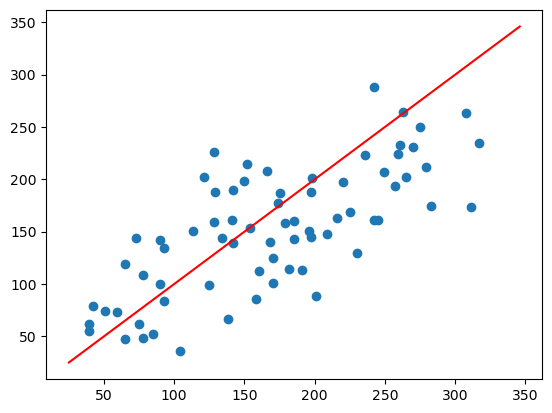

In [38]:
x_aux = np.linspace(y.min(), y.max(), 100)
y_aux = x_aux
plt.figure()
plt.scatter(y_val, ypred1)
plt.plot(x_aux, y_aux, color='red')
plt.show()